<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">INFO</h1>

In this script, we compare players in a game. \
All programs are evaluated on the same game configurations. \
We do not show the game interface here, to make the script faster. \
The goal is to compare the performances of the different random players in the same conditions.

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">IMPORTS</h1>

In [5]:
# External imports
import sys
import os
import tqdm.auto as tqdm
import matplotlib.pyplot as pyplot
import scipy.stats as scstats

# Add needed directories to the path
sys.path.append(os.path.join("..", "players"))

# PyRat imports
from Exhaustive import Exhaustive
from Backtracking import Backtracking
from pyrat import Game, PlayerSkin

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">CONSTANTS</h1>

In this script, we are going to make multiple independent games. \
The goal is to collect enough statistics to draw conclusions on which algorithm is better than the other. \
This constant defines how many games are made.

In [6]:
# Determines how many games will be played for each player
NB_GAMES = 50

Let's configure the game with a dictionary. \
Note that we put the game mode as `SIMULATION` to perform all games as fast as possible.

In [7]:
# Customize the game elements
CONFIG = {"mud_percentage": 20.0,
          "nb_cheese": 5,
          "game_mode": GameMode.SIMULATION}

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">RUN THE GAMES</h1>

Let us now perform all games. \
For each game, we remember the number of turns needed to complete it.

In [8]:
# Players to test (keys are legends to appear in the plot)
players = {
    "Exhaustive": {"class": Exhaustive, "args": {}},
    "Backtracking": {"class": Backtracking, "args": {}},
}
# Run the games for each player
results = {player: [] for player in players}
for key in players:
    for seed in tqdm.tqdm(range(NB_GAMES), desc=key):
        
        # Make the game with given seed
        game = Game(random_seed=seed, **CONFIG)
        player = players[key]["class"](**players[key]["args"])
        game.add_player(player)
        stats = game.start()
        
        # Store the number of turns needed
        results[key].append(stats["turns"])

Exhaustive:   0%|          | 0/50 [00:00<?, ?it/s]

Constructor
Preprocessing


Exhaustive:   2%|▏         | 1/50 [00:00<00:18,  2.62it/s]

Route: [82, 67, 52, 53, 38, 23, 8, 9, 10, 11, 12, 27, 27, 12, 11, 10, 9, 8, 23, 38, 37, 36, 35, 34, 33, 48, 63, 62, 62, 47, 46, 61, 61, 76, 91, 92, 93, 108, 108, 109, 124, 139, 140, 141, 156, 171, 172, 173, 174, 189, 190, 191, 192]
Computed Actions: [<Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>

Exhaustive:   4%|▍         | 2/50 [00:00<00:17,  2.72it/s]

Route: [97, 98, 83, 84, 85, 100, 100, 115, 130, 145, 145, 160, 161, 162, 177, 176, 191, 192, 193, 194, 179, 179, 194, 193, 192, 191, 176, 177, 162, 161, 160, 159, 158, 173, 173, 158, 143, 128, 127, 126, 111, 110, 109, 124, 123, 138, 137]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WES

Exhaustive:   6%|▌         | 3/50 [00:01<00:17,  2.66it/s]

Route: [97, 98, 99, 100, 101, 102, 87, 88, 103, 103, 118, 117, 116, 131, 146, 146, 131, 116, 115, 100, 100, 99, 84, 69, 68, 67, 66, 51, 36, 35, 34, 33, 32, 31, 46, 61, 60, 75, 90, 105, 120, 135, 150, 165, 165, 150, 135, 120, 105, 90, 75, 60, 61, 46, 31, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Actio

Exhaustive:   8%|▊         | 4/50 [00:01<00:18,  2.48it/s]

Route: [97, 96, 81, 66, 65, 50, 35, 20, 5, 6, 7, 7, 6, 5, 20, 35, 50, 49, 64, 79, 78, 77, 92, 107, 122, 121, 106, 105, 105, 106, 121, 120, 135, 136, 151, 166, 166, 181, 180, 180, 181, 182, 183, 184, 185, 186, 187, 188, 173, 174, 175, 176, 161, 146, 147, 148, 163]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.

Exhaustive:  10%|█         | 5/50 [00:01<00:18,  2.47it/s]

Route: [97, 112, 127, 142, 141, 156, 157, 158, 159, 174, 189, 190, 191, 176, 176, 191, 192, 177, 178, 178, 177, 162, 147, 132, 117, 116, 115, 115, 100, 99, 98, 97, 82, 67, 67, 82, 81, 96, 95, 80, 79, 64, 49, 34, 33, 18, 17, 16]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'we

Exhaustive:  12%|█▏        | 6/50 [00:02<00:18,  2.44it/s]

Route: [97, 112, 111, 110, 109, 108, 93, 78, 63, 48, 47, 32, 17, 17, 32, 47, 48, 63, 78, 93, 108, 109, 124, 124, 125, 126, 141, 156, 157, 172, 187, 188, 189, 190, 191, 191, 176, 161, 146, 131, 130, 115, 100, 85, 70, 71, 72, 73, 58, 57, 42, 27, 28, 43, 43, 28, 13]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Act

Exhaustive:  14%|█▍        | 7/50 [00:02<00:17,  2.44it/s]

Route: [97, 96, 95, 94, 79, 79, 94, 109, 124, 124, 109, 94, 95, 96, 97, 98, 99, 114, 129, 144, 159, 174, 189, 189, 174, 175, 176, 177, 162, 147, 146, 131, 131, 132, 117, 118, 103, 88, 87, 86, 71, 72, 57, 42, 41]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Actio

Exhaustive:  16%|█▌        | 8/50 [00:03<00:17,  2.44it/s]

Route: [97, 112, 127, 126, 125, 124, 139, 138, 137, 136, 135, 150, 165, 165, 150, 135, 136, 137, 138, 139, 124, 125, 126, 127, 112, 97, 82, 67, 52, 37, 38, 23, 24, 25, 25, 24, 23, 38, 37, 36, 21, 21, 20, 19, 18, 33, 32, 47, 46, 46, 31, 16, 15, 0]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NO

Exhaustive:  18%|█▊        | 9/50 [00:03<00:17,  2.39it/s]

Route: [97, 82, 81, 80, 65, 66, 51, 52, 37, 22, 7, 8, 8, 7, 22, 37, 52, 51, 66, 65, 50, 50, 65, 80, 81, 82, 83, 98, 113, 128, 129, 144, 159, 158, 158, 159, 144, 143, 142, 157, 156, 171, 186, 186, 171, 156, 155, 170, 169, 154, 153, 152, 151, 150, 165, 180]
Computed Actions: [<Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 

Exhaustive:  20%|██        | 10/50 [00:04<00:16,  2.47it/s]

Route: [97, 98, 99, 84, 85, 85, 84, 99, 114, 129, 130, 131, 146, 147, 148, 133, 134, 119, 104, 89, 89, 104, 119, 134, 133, 118, 118, 133, 148, 147, 146, 131, 130, 129, 144, 143, 158, 157, 157, 156, 155, 154, 153, 152, 151, 150, 165, 180]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Acti

Exhaustive:  22%|██▏       | 11/50 [00:04<00:15,  2.58it/s]

Route: [97, 98, 99, 114, 115, 116, 117, 102, 87, 72, 72, 73, 58, 57, 57, 56, 55, 54, 53, 52, 51, 50, 50, 51, 36, 36, 21, 20, 19, 18, 17, 16, 1]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>]
Turn 1
Turn 2
Turn 3
Turn 7
Turn 8
Turn 9
Turn 10
Turn 11
Tur

Exhaustive:  24%|██▍       | 12/50 [00:04<00:14,  2.55it/s]

Route: [82, 81, 66, 51, 36, 35, 20, 19, 4, 4, 19, 34, 49, 50, 50, 51, 66, 81, 96, 95, 110, 125, 124, 139, 138, 123, 123, 138, 153, 168, 183, 182, 181, 180, 165, 150, 135, 135, 150, 165, 180, 181, 182, 183, 184, 185, 186, 187, 188, 173, 174, 175, 176, 177, 178, 193]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'sou

Exhaustive:  26%|██▌       | 13/50 [00:05<00:14,  2.57it/s]

Route: [82, 83, 68, 53, 54, 55, 40, 41, 42, 43, 58, 59, 44, 29, 14, 14, 29, 44, 59, 58, 43, 43, 42, 41, 26, 25, 24, 23, 22, 21, 36, 35, 35, 50, 49, 48, 63, 78, 93, 108, 123, 124, 125, 125, 140, 139, 138]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'

Exhaustive:  28%|██▊       | 14/50 [00:05<00:14,  2.56it/s]

Route: [97, 96, 95, 94, 109, 108, 123, 138, 137, 136, 151, 151, 136, 137, 138, 123, 108, 109, 94, 95, 96, 111, 112, 113, 98, 99, 84, 83, 82, 82, 83, 68, 53, 54, 39, 38, 37, 37, 38, 39, 54, 69, 84, 99, 98, 113, 112, 127, 142, 157, 157, 158, 159, 174, 175, 176, 177, 178, 179]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Acti

Exhaustive:  30%|███       | 15/50 [00:05<00:13,  2.59it/s]

Route: [97, 82, 81, 66, 51, 36, 21, 6, 7, 7, 6, 21, 36, 51, 66, 65, 64, 79, 94, 93, 78, 78, 93, 94, 109, 124, 139, 140, 140, 139, 138, 153, 168, 169, 170, 171, 172, 172, 173, 158, 159, 144, 145, 146, 161, 162, 163, 148]
Computed Actions: [<Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'sou

Exhaustive:  32%|███▏      | 16/50 [00:06<00:13,  2.58it/s]

Route: [97, 112, 127, 127, 126, 141, 141, 126, 127, 142, 143, 158, 173, 174, 159, 160, 160, 159, 174, 173, 158, 143, 128, 129, 130, 131, 131, 116, 101, 86, 85, 84, 69, 54, 53, 38, 23, 8, 9, 10]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'nort

Exhaustive:  34%|███▍      | 17/50 [00:06<00:13,  2.49it/s]

Route: [112, 127, 142, 157, 158, 173, 174, 175, 160, 145, 130, 131, 132, 117, 102, 102, 117, 132, 147, 147, 162, 177, 176, 161, 161, 176, 175, 174, 173, 158, 157, 142, 127, 112, 111, 110, 109, 94, 79, 64, 49, 34, 34, 49, 48, 47]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NO

Exhaustive:  36%|███▌      | 18/50 [00:07<00:12,  2.48it/s]

Route: [97, 82, 83, 68, 67, 67, 52, 37, 22, 7, 6, 5, 5, 4, 19, 18, 17, 32, 47, 48, 63, 63, 78, 93, 108, 123, 138, 139, 140, 125, 126, 127, 128, 129, 144, 159, 174, 189, 190, 191, 191, 190, 189, 174, 159, 160, 161]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Act

Exhaustive:  38%|███▊      | 19/50 [00:07<00:12,  2.49it/s]

Route: [111, 110, 125, 140, 141, 156, 171, 172, 173, 188, 189, 190, 175, 160, 161, 162, 147, 132, 133, 118, 119, 134, 134, 119, 118, 103, 88, 73, 58, 57, 42, 42, 57, 56, 41, 40, 25, 24, 23, 23, 22, 21, 36, 36, 21, 6, 5, 4]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>,

Exhaustive:  40%|████      | 20/50 [00:07<00:11,  2.53it/s]

Route: [97, 112, 113, 128, 129, 144, 159, 160, 175, 190, 191, 191, 176, 161, 146, 147, 148, 148, 163, 164, 149, 134, 119, 104, 103, 102, 101, 101, 86, 87, 72, 73, 74, 59, 44, 44, 43, 28, 27, 42, 57, 56, 55, 40, 39, 24, 23, 8, 7]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST

Exhaustive:  42%|████▏     | 21/50 [00:08<00:11,  2.49it/s]

Route: [82, 81, 80, 79, 94, 94, 79, 80, 81, 82, 83, 98, 99, 100, 85, 86, 71, 71, 56, 41, 26, 11, 11, 26, 41, 56, 71, 86, 87, 88, 103, 104, 119, 134, 133, 133, 132, 147, 146, 145, 160, 159, 174, 173, 158, 157, 156, 155, 154, 169, 168, 183, 182, 181, 166, 165]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.S

Exhaustive:  44%|████▍     | 22/50 [00:08<00:11,  2.48it/s]

Route: [82, 81, 66, 65, 50, 49, 48, 33, 18, 18, 33, 48, 47, 62, 77, 92, 107, 106, 105, 105, 106, 107, 122, 137, 138, 139, 154, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 163, 164, 164, 163, 178, 177, 162, 147, 132, 117, 102, 101, 86, 71, 56, 57, 57, 72]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST:

Exhaustive:  46%|████▌     | 23/50 [00:09<00:10,  2.52it/s]

Route: [97, 112, 127, 142, 141, 141, 142, 143, 144, 144, 129, 114, 115, 116, 117, 117, 102, 87, 86, 71, 70, 69, 54, 53, 52, 51, 36, 21, 21, 22]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>]
Turn 1
Turn 2
Turn 3
Turn 4
Turn 5
Turn 6
Turn 7
Turn 8
Turn 9
Turn 10
Turn 11
Turn 12
Turn 13
Turn 14
Turn 15
Turn 16
Turn 

Exhaustive:  48%|████▊     | 24/50 [00:09<00:10,  2.54it/s]

Route: [96, 81, 66, 67, 67, 68, 69, 70, 71, 86, 86, 87, 102, 101, 116, 131, 146, 161, 176, 175, 174, 189, 189, 174, 175, 176, 161, 146, 147, 132, 117, 117, 102, 87, 88, 89, 74, 59, 44, 29, 14]
Computed Actions: [<Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north

Exhaustive:  50%|█████     | 25/50 [00:09<00:10,  2.48it/s]

Route: [97, 98, 113, 114, 129, 144, 145, 160, 161, 146, 146, 161, 160, 145, 144, 129, 114, 113, 98, 83, 83, 68, 53, 54, 55, 56, 41, 26, 27, 27, 26, 41, 56, 55, 54, 53, 52, 51, 50, 35, 34, 33, 18, 3, 2, 1, 1, 2, 3, 18, 33, 32, 31, 46, 61, 76, 91, 90, 105]
Computed Actions: [<Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WES

Exhaustive:  52%|█████▏    | 26/50 [00:10<00:09,  2.50it/s]

Route: [97, 82, 67, 68, 53, 53, 68, 67, 52, 51, 66, 65, 64, 64, 79, 80, 80, 65, 66, 51, 52, 37, 38, 39, 24, 25, 40, 41, 41, 26, 27, 28, 13]
Computed Actions: [<Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>]
Turn 1
Turn 2
Turn 3
Turn 4
Turn 5
Turn 6
Turn 7
Turn

Exhaustive:  54%|█████▍    | 27/50 [00:10<00:08,  2.57it/s]

Route: [97, 96, 111, 111, 96, 81, 82, 83, 98, 99, 99, 98, 83, 68, 67, 66, 51, 36, 21, 6, 5, 4, 19, 19, 18, 17, 32, 32, 31, 30]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>]
Turn 1
Turn 2
Turn 6
Turn 7
Turn 11
Turn 12
Turn 13
Turn 14
Turn 15
Turn 16
Turn 17
Turn 18
Turn 19
Turn 20
Turn 21
Turn 22
Turn 23
Turn 24

Exhaustive:  56%|█████▌    | 28/50 [00:11<00:08,  2.54it/s]

Route: [97, 96, 81, 80, 95, 110, 110, 95, 94, 93, 93, 94, 79, 78, 63, 62, 62, 61, 46, 47, 48, 49, 34, 35, 20, 21, 21, 22, 7, 8, 9, 10, 11, 12, 13, 28, 29]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, 

Exhaustive:  58%|█████▊    | 29/50 [00:11<00:08,  2.62it/s]

Route: [97, 96, 95, 110, 109, 108, 123, 123, 108, 109, 110, 95, 96, 111, 126, 126, 111, 96, 97, 82, 67, 68, 69, 70, 85, 86, 101, 116, 116, 101, 86, 85, 70, 55, 56, 57, 72, 71, 71, 72, 73]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action

Exhaustive:  60%|██████    | 30/50 [00:11<00:07,  2.59it/s]

Route: [98, 113, 112, 127, 142, 143, 158, 159, 160, 175, 176, 176, 175, 160, 161, 146, 131, 116, 101, 102, 87, 88, 73, 74, 59, 44, 29, 28, 27, 27, 28, 29, 44, 59, 74, 73, 88, 87, 102, 101, 116, 131, 130, 129, 144, 143, 128, 128, 143, 142, 127, 126, 125, 124, 123, 122, 121, 120, 105, 90, 75, 60, 45, 46, 31, 16, 1, 2, 3, 3, 4, 19, 20, 35, 36, 51]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, 

Exhaustive:  62%|██████▏   | 31/50 [00:12<00:07,  2.64it/s]

Route: [97, 82, 83, 84, 99, 100, 101, 116, 115, 115, 116, 101, 100, 99, 84, 83, 82, 67, 66, 65, 64, 63, 62, 62, 63, 64, 65, 80, 79, 79, 80, 65, 50, 51, 36, 36, 35, 20, 5]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 

Exhaustive:  64%|██████▍   | 32/50 [00:12<00:06,  2.64it/s]

Route: [97, 98, 99, 100, 101, 86, 87, 88, 88, 73, 74, 89, 89, 74, 73, 88, 87, 86, 101, 100, 99, 98, 113, 128, 129, 130, 130, 145, 160, 159, 174, 174, 159, 158, 143, 128, 127, 142, 157, 156, 155, 170, 169, 154, 153, 168, 167, 166, 151, 150, 165]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Actio

Exhaustive:  66%|██████▌   | 33/50 [00:13<00:06,  2.49it/s]

Route: [97, 96, 111, 112, 127, 128, 129, 130, 145, 146, 161, 176, 177, 162, 147, 132, 133, 133, 118, 118, 133, 132, 131, 116, 101, 86, 71, 56, 41, 26, 11, 10, 9, 8, 8, 9, 10, 11, 26, 27, 28, 29, 44, 44, 59]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST:

Exhaustive:  68%|██████▊   | 34/50 [00:13<00:06,  2.52it/s]

Route: [97, 98, 83, 68, 67, 66, 51, 36, 35, 20, 19, 34, 34, 19, 4, 5, 6, 6, 21, 20, 35, 36, 51, 66, 67, 68, 69, 70, 55, 55, 70, 85, 86, 101, 116, 116, 117, 132, 147, 162, 177, 176, 191, 190, 189, 188]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east

Exhaustive:  70%|███████   | 35/50 [00:13<00:05,  2.51it/s]

Route: [81, 66, 67, 52, 37, 22, 23, 8, 7, 6, 6, 5, 4, 3, 2, 1, 1, 16, 15, 30, 45, 60, 61, 76, 77, 92, 107, 122, 137, 138, 153, 154, 169, 170, 185, 186, 186, 185, 170, 171, 156, 157, 158, 143, 144, 145, 146, 147, 148, 149, 164, 179, 194, 193, 192, 177, 177, 176]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUT

Exhaustive:  72%|███████▏  | 36/50 [00:14<00:05,  2.49it/s]

Route: [97, 98, 99, 100, 101, 102, 117, 117, 118, 119, 134, 149, 148, 163, 163, 162, 161, 160, 159, 158, 173, 172, 187, 187, 172, 173, 158, 157, 142, 141, 140, 125, 110, 109, 94, 93, 78, 77, 62, 61, 61, 62, 63, 48, 33, 34, 35, 50, 51, 36, 21, 22, 7, 8]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <A

Exhaustive:  74%|███████▍  | 37/50 [00:14<00:05,  2.52it/s]

Route: [97, 96, 95, 110, 109, 124, 139, 154, 154, 169, 170, 185, 186, 171, 172, 157, 158, 143, 128, 113, 114, 115, 130, 145, 144, 144, 145, 130, 115, 114, 99, 84, 69, 70, 71, 72, 73, 74, 59, 44, 29, 14, 14, 29, 44, 43, 42, 27, 26, 26, 41, 40, 25, 24, 23, 38, 37, 22, 21, 20, 5, 6, 7]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WES

Exhaustive:  76%|███████▌  | 38/50 [00:15<00:04,  2.56it/s]

Route: [97, 112, 111, 126, 141, 140, 155, 170, 169, 169, 170, 155, 154, 153, 138, 123, 122, 107, 106, 91, 76, 75, 60, 60, 75, 76, 77, 78, 63, 63, 64, 65, 66, 67, 68, 53, 54, 55, 56, 57, 58, 59, 59, 58, 43, 28, 29]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.

Exhaustive:  78%|███████▊  | 39/50 [00:15<00:04,  2.58it/s]

Route: [97, 96, 95, 110, 111, 126, 141, 156, 171, 186, 186, 171, 156, 141, 142, 157, 158, 143, 144, 159, 174, 175, 176, 161, 146, 147, 148, 148, 147, 132, 117, 102, 87, 72, 57, 56, 41, 40, 39, 38, 37, 36, 21, 6, 7, 7, 6, 5, 4, 3, 18, 33, 32, 31, 46, 61, 60, 60, 61, 76, 91, 90, 105, 106, 121]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <A

Exhaustive:  80%|████████  | 40/50 [00:15<00:03,  2.61it/s]

Route: [97, 82, 81, 66, 66, 81, 82, 97, 112, 127, 142, 157, 172, 172, 157, 142, 143, 158, 158, 159, 160, 145, 130, 115, 100, 101, 101, 102, 103, 118]
Computed Actions: [<Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>]
Turn 1
Turn 2
Turn 3
Turn 4
Turn 5
Turn 6
Turn 7
Turn 8
Turn 9
Turn 10
Turn 11
Turn 12
Turn 13
Turn 14
Tur

Exhaustive:  82%|████████▏ | 41/50 [00:16<00:03,  2.53it/s]

Route: [97, 112, 111, 110, 109, 124, 139, 154, 154, 139, 124, 109, 108, 107, 106, 106, 107, 108, 109, 110, 95, 80, 65, 66, 67, 52, 53, 38, 23, 8, 8, 9, 10, 11, 26, 27, 42, 57, 72, 87, 102, 103, 118, 133, 148, 163, 178, 178, 179]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'e

Exhaustive:  84%|████████▍ | 42/50 [00:16<00:03,  2.57it/s]

Route: [97, 82, 83, 98, 99, 114, 115, 116, 117, 132, 147, 162, 163, 148, 148, 163, 163, 162, 147, 132, 117, 116, 115, 114, 99, 84, 69, 69, 54, 39, 38, 38, 39, 24, 25, 10, 11, 12, 13, 28, 43]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>

Exhaustive:  86%|████████▌ | 43/50 [00:16<00:02,  2.58it/s]

Route: [97, 98, 99, 114, 129, 144, 159, 174, 189, 190, 191, 192, 177, 178, 178, 177, 192, 191, 190, 189, 174, 159, 158, 157, 156, 155, 154, 153, 153, 154, 155, 140, 139, 138, 123, 108, 93, 94, 79, 64, 65, 65, 64, 49, 34, 35, 36, 21, 22, 23, 38, 53, 53, 38, 23, 8, 9, 10, 25, 26, 11, 12, 13, 14, 29, 28]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <A

Exhaustive:  88%|████████▊ | 44/50 [00:17<00:02,  2.63it/s]

Route: [98, 99, 100, 101, 102, 103, 88, 89, 104, 104, 89, 74, 59, 58, 43, 44, 29, 29, 14, 13, 28, 27, 27, 26, 25, 10, 9, 8, 23, 38, 37, 36, 35, 35, 34, 33, 48, 63, 62, 77, 92, 107, 122, 123, 124, 125, 140, 155, 156, 171, 172, 187, 186]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST:

Exhaustive:  90%|█████████ | 45/50 [00:17<00:01,  2.68it/s]

Route: [97, 98, 99, 100, 85, 70, 71, 56, 55, 55, 56, 71, 70, 85, 100, 115, 130, 145, 144, 159, 159, 174, 173, 158, 143, 142, 141, 141, 142, 157, 157, 158, 173, 174, 175, 190, 191, 176, 177, 192, 193, 194]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOU

Exhaustive:  92%|█████████▏| 46/50 [00:18<00:01,  2.73it/s]

Route: [97, 96, 111, 110, 125, 125, 126, 127, 128, 129, 144, 145, 145, 146, 131, 132, 117, 118, 103, 88, 87, 72, 72, 87, 86, 71, 70, 85, 85, 70, 55, 56, 57, 42, 27, 12, 13]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'

Exhaustive:  94%|█████████▍| 47/50 [00:18<00:01,  2.70it/s]

Route: [97, 98, 83, 84, 85, 70, 71, 72, 73, 73, 72, 71, 70, 55, 40, 39, 38, 37, 22, 21, 20, 20, 21, 36, 51, 50, 49, 48, 48, 63, 78, 93, 108, 123, 124, 139, 138, 153, 168, 183, 183, 168, 153, 138, 139, 124, 123, 108, 93, 78, 77, 92, 91, 106, 121]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.S

Exhaustive:  96%|█████████▌| 48/50 [00:18<00:00,  2.58it/s]

Route: [97, 112, 127, 142, 143, 144, 145, 146, 147, 148, 149, 149, 148, 147, 132, 117, 116, 115, 114, 114, 129, 144, 143, 158, 173, 172, 157, 156, 155, 140, 125, 124, 123, 122, 107, 107, 92, 91, 76, 61, 46, 47, 47, 48, 33, 32, 17, 18, 19, 20, 21, 22, 23, 24, 39, 40]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH

Exhaustive:  98%|█████████▊| 49/50 [00:19<00:00,  2.53it/s]

Route: [97, 96, 111, 112, 113, 114, 115, 116, 101, 102, 103, 104, 89, 89, 104, 103, 102, 101, 116, 115, 114, 113, 128, 129, 144, 159, 159, 144, 143, 142, 127, 126, 125, 110, 95, 95, 110, 125, 140, 155, 170, 169, 168, 167, 167, 152, 151, 150, 135]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST

Exhaustive: 100%|██████████| 50/50 [00:19<00:00,  2.55it/s]


Route: [97, 112, 127, 127, 142, 143, 158, 159, 174, 175, 176, 177, 178, 193, 193, 178, 177, 177, 176, 161, 146, 145, 144, 129, 130, 131, 131, 116, 117, 102, 87, 72, 57, 42, 27, 28, 29]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Actio

Backtracking:   0%|          | 0/50 [00:00<?, ?it/s]

Constructor
Preprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:19,  2.56it/s]

Route: [82, 67, 52, 53, 38, 23, 8, 9, 10, 11, 12, 27, 27, 12, 11, 10, 9, 8, 23, 38, 37, 36, 35, 34, 33, 48, 63, 62, 62, 47, 46, 61, 61, 76, 91, 92, 93, 108, 108, 109, 124, 139, 140, 141, 156, 171, 172, 173, 174, 189, 190, 191, 192]
Computed Actions: [<Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>

Backtracking:   4%|▍         | 2/50 [00:00<00:19,  2.49it/s]

Route: [97, 98, 83, 84, 85, 100, 100, 115, 130, 145, 145, 160, 161, 162, 177, 176, 191, 192, 193, 194, 179, 179, 194, 193, 192, 191, 176, 177, 162, 161, 160, 159, 158, 173, 173, 158, 143, 128, 127, 126, 111, 110, 109, 124, 123, 138, 137]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WES

Backtracking:   6%|▌         | 3/50 [00:01<00:18,  2.48it/s]

Route: [97, 98, 99, 100, 101, 102, 87, 88, 103, 103, 118, 117, 116, 131, 146, 146, 131, 116, 115, 100, 100, 99, 84, 69, 68, 67, 66, 51, 36, 35, 34, 33, 32, 31, 46, 61, 60, 75, 90, 105, 120, 135, 150, 165, 165, 150, 135, 120, 105, 90, 75, 60, 61, 46, 31, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Actio

Backtracking:   8%|▊         | 4/50 [00:01<00:18,  2.46it/s]

Route: [97, 96, 81, 66, 65, 50, 35, 20, 5, 6, 7, 7, 6, 5, 20, 35, 50, 49, 64, 79, 78, 77, 92, 107, 122, 121, 106, 105, 105, 106, 121, 120, 135, 136, 151, 166, 166, 181, 180, 180, 181, 182, 183, 184, 185, 186, 187, 188, 173, 174, 175, 176, 161, 146, 147, 148, 163]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.

Backtracking:  10%|█         | 5/50 [00:02<00:18,  2.49it/s]

Route: [97, 112, 127, 142, 141, 156, 157, 158, 159, 174, 189, 190, 191, 176, 176, 191, 192, 177, 178, 178, 177, 162, 147, 132, 117, 116, 115, 115, 100, 99, 98, 97, 82, 67, 67, 82, 81, 96, 95, 80, 79, 64, 49, 34, 33, 18, 17, 16]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'we

Backtracking:  12%|█▏        | 6/50 [00:02<00:17,  2.50it/s]

Route: [97, 112, 111, 110, 109, 108, 93, 78, 63, 48, 47, 32, 17, 17, 32, 47, 48, 63, 78, 93, 108, 109, 124, 124, 125, 126, 141, 156, 157, 172, 187, 188, 189, 190, 191, 191, 176, 161, 146, 131, 130, 115, 100, 85, 70, 71, 72, 73, 58, 57, 42, 27, 28, 43, 43, 28, 13]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Act

Backtracking:  14%|█▍        | 7/50 [00:02<00:17,  2.50it/s]

Route: [97, 96, 95, 94, 79, 79, 94, 109, 124, 124, 109, 94, 95, 96, 97, 98, 99, 114, 129, 144, 159, 174, 189, 189, 174, 175, 176, 177, 162, 147, 146, 131, 131, 132, 117, 118, 103, 88, 87, 86, 71, 72, 57, 42, 41]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Actio

Backtracking:  16%|█▌        | 8/50 [00:03<00:16,  2.53it/s]

Route: [97, 112, 127, 126, 125, 124, 139, 138, 137, 136, 135, 150, 165, 165, 150, 135, 136, 137, 138, 139, 124, 125, 126, 127, 112, 97, 82, 67, 52, 37, 38, 23, 24, 25, 25, 24, 23, 38, 37, 36, 21, 21, 20, 19, 18, 33, 32, 47, 46, 46, 31, 16, 15, 0]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NO

Backtracking:  18%|█▊        | 9/50 [00:03<00:17,  2.37it/s]

Route: [97, 82, 81, 80, 65, 66, 51, 52, 37, 22, 7, 8, 8, 7, 22, 37, 52, 51, 66, 65, 50, 50, 65, 80, 81, 82, 83, 98, 113, 128, 129, 144, 159, 158, 158, 159, 144, 143, 142, 157, 156, 171, 186, 186, 171, 156, 155, 170, 169, 154, 153, 152, 151, 150, 165, 180]
Computed Actions: [<Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 

Backtracking:  20%|██        | 10/50 [00:04<00:17,  2.31it/s]

Route: [97, 98, 99, 84, 85, 85, 84, 99, 114, 129, 130, 131, 146, 147, 148, 133, 134, 119, 104, 89, 89, 104, 119, 134, 133, 118, 118, 133, 148, 147, 146, 131, 130, 129, 144, 143, 158, 157, 157, 156, 155, 154, 153, 152, 151, 150, 165, 180]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Acti

Backtracking:  22%|██▏       | 11/50 [00:04<00:16,  2.41it/s]

Route: [97, 98, 99, 114, 115, 116, 117, 102, 87, 72, 72, 73, 58, 57, 57, 56, 55, 54, 53, 52, 51, 50, 50, 51, 36, 36, 21, 20, 19, 18, 17, 16, 1]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>]
Turn 1
Turn 2
Turn 3
Turn 7
Turn 8
Turn 9
Turn 10
Turn 11
Tur

Backtracking:  24%|██▍       | 12/50 [00:04<00:15,  2.39it/s]

Route: [82, 81, 66, 51, 36, 35, 20, 19, 4, 4, 19, 34, 49, 50, 50, 51, 66, 81, 96, 95, 110, 125, 124, 139, 138, 123, 123, 138, 153, 168, 183, 182, 181, 180, 165, 150, 135, 135, 150, 165, 180, 181, 182, 183, 184, 185, 186, 187, 188, 173, 174, 175, 176, 177, 178, 193]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'sou

Backtracking:  26%|██▌       | 13/50 [00:05<00:15,  2.43it/s]

Route: [82, 83, 68, 53, 54, 55, 40, 41, 42, 43, 58, 59, 44, 29, 14, 14, 29, 44, 59, 58, 43, 43, 42, 41, 26, 25, 24, 23, 22, 21, 36, 35, 35, 50, 49, 48, 63, 78, 93, 108, 123, 124, 125, 125, 140, 139, 138]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'

Backtracking:  28%|██▊       | 14/50 [00:05<00:14,  2.46it/s]

Route: [97, 96, 95, 94, 109, 108, 123, 138, 137, 136, 151, 151, 136, 137, 138, 123, 108, 109, 94, 95, 96, 111, 112, 113, 98, 99, 84, 83, 82, 82, 83, 68, 53, 54, 39, 38, 37, 37, 38, 39, 54, 69, 84, 99, 98, 113, 112, 127, 142, 157, 157, 158, 159, 174, 175, 176, 177, 178, 179]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Acti

Backtracking:  30%|███       | 15/50 [00:06<00:13,  2.52it/s]

Route: [97, 82, 81, 66, 51, 36, 21, 6, 7, 7, 6, 21, 36, 51, 66, 65, 64, 79, 94, 93, 78, 78, 93, 94, 109, 124, 139, 140, 140, 139, 138, 153, 168, 169, 170, 171, 172, 172, 173, 158, 159, 144, 145, 146, 161, 162, 163, 148]
Computed Actions: [<Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'sou

Backtracking:  32%|███▏      | 16/50 [00:06<00:13,  2.55it/s]

Route: [97, 112, 127, 127, 126, 141, 141, 126, 127, 142, 143, 158, 173, 174, 159, 160, 160, 159, 174, 173, 158, 143, 128, 129, 130, 131, 131, 116, 101, 86, 85, 84, 69, 54, 53, 38, 23, 8, 9, 10]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'nort

Backtracking:  34%|███▍      | 17/50 [00:06<00:12,  2.57it/s]

Route: [112, 127, 142, 157, 158, 173, 174, 175, 160, 145, 130, 131, 132, 117, 102, 102, 117, 132, 147, 147, 162, 177, 176, 161, 161, 176, 175, 174, 173, 158, 157, 142, 127, 112, 111, 110, 109, 94, 79, 64, 49, 34, 34, 49, 48, 47]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NO

Backtracking:  36%|███▌      | 18/50 [00:07<00:13,  2.46it/s]

Route: [97, 82, 83, 68, 67, 67, 52, 37, 22, 7, 6, 5, 5, 4, 19, 18, 17, 32, 47, 48, 63, 63, 78, 93, 108, 123, 138, 139, 140, 125, 126, 127, 128, 129, 144, 159, 174, 189, 190, 191, 191, 190, 189, 174, 159, 160, 161]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Act

Backtracking:  38%|███▊      | 19/50 [00:07<00:12,  2.47it/s]

Route: [111, 110, 125, 140, 141, 156, 171, 172, 173, 188, 189, 190, 175, 160, 161, 162, 147, 132, 133, 118, 119, 134, 134, 119, 118, 103, 88, 73, 58, 57, 42, 42, 57, 56, 41, 40, 25, 24, 23, 23, 22, 21, 36, 36, 21, 6, 5, 4]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>,

Backtracking:  40%|████      | 20/50 [00:08<00:12,  2.50it/s]

Route: [97, 112, 113, 128, 129, 144, 159, 160, 175, 190, 191, 191, 176, 161, 146, 147, 148, 148, 163, 164, 149, 134, 119, 104, 103, 102, 101, 101, 86, 87, 72, 73, 74, 59, 44, 44, 43, 28, 27, 42, 57, 56, 55, 40, 39, 24, 23, 8, 7]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST

Backtracking:  42%|████▏     | 21/50 [00:08<00:11,  2.55it/s]

Route: [82, 81, 80, 79, 94, 94, 79, 80, 81, 82, 83, 98, 99, 100, 85, 86, 71, 71, 56, 41, 26, 11, 11, 26, 41, 56, 71, 86, 87, 88, 103, 104, 119, 134, 133, 133, 132, 147, 146, 145, 160, 159, 174, 173, 158, 157, 156, 155, 154, 169, 168, 183, 182, 181, 166, 165]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.S

Backtracking:  44%|████▍     | 22/50 [00:08<00:11,  2.52it/s]

Route: [82, 81, 66, 65, 50, 49, 48, 33, 18, 18, 33, 48, 47, 62, 77, 92, 107, 106, 105, 105, 106, 107, 122, 137, 138, 139, 154, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 163, 164, 164, 163, 178, 177, 162, 147, 132, 117, 102, 101, 86, 71, 56, 57, 57, 72]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST:

Backtracking:  46%|████▌     | 23/50 [00:09<00:10,  2.56it/s]

Route: [97, 112, 127, 142, 141, 141, 142, 143, 144, 144, 129, 114, 115, 116, 117, 117, 102, 87, 86, 71, 70, 69, 54, 53, 52, 51, 36, 21, 21, 22]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>]
Turn 1
Turn 2
Turn 3
Turn 4
Turn 5
Turn 6
Turn 7
Turn 8
Turn 9
Turn 10
Turn 11
Turn 12
Turn 13
Turn 14
Turn 15
Turn 16
Turn 

Backtracking:  48%|████▊     | 24/50 [00:09<00:10,  2.48it/s]

Route: [96, 81, 66, 67, 67, 68, 69, 70, 71, 86, 86, 87, 102, 101, 116, 131, 146, 161, 176, 175, 174, 189, 189, 174, 175, 176, 161, 146, 147, 132, 117, 117, 102, 87, 88, 89, 74, 59, 44, 29, 14]
Computed Actions: [<Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north

Backtracking:  50%|█████     | 25/50 [00:10<00:10,  2.50it/s]

Route: [97, 98, 113, 114, 129, 144, 145, 160, 161, 146, 146, 161, 160, 145, 144, 129, 114, 113, 98, 83, 83, 68, 53, 54, 55, 56, 41, 26, 27, 27, 26, 41, 56, 55, 54, 53, 52, 51, 50, 35, 34, 33, 18, 3, 2, 1, 1, 2, 3, 18, 33, 32, 31, 46, 61, 76, 91, 90, 105]
Computed Actions: [<Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WES

Backtracking:  52%|█████▏    | 26/50 [00:10<00:09,  2.52it/s]

Route: [97, 82, 67, 68, 53, 53, 68, 67, 52, 51, 66, 65, 64, 64, 79, 80, 80, 65, 66, 51, 52, 37, 38, 39, 24, 25, 40, 41, 41, 26, 27, 28, 13]
Computed Actions: [<Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>]
Turn 1
Turn 2
Turn 3
Turn 4
Turn 5
Turn 6
Turn 7
Turn

Backtracking:  54%|█████▍    | 27/50 [00:10<00:09,  2.53it/s]

Route: [97, 96, 111, 111, 96, 81, 82, 83, 98, 99, 99, 98, 83, 68, 67, 66, 51, 36, 21, 6, 5, 4, 19, 19, 18, 17, 32, 32, 31, 30]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>]
Turn 1
Turn 2
Turn 6
Turn 7
Turn 11
Turn 12
Turn 13
Turn 14
Turn 15
Turn 16
Turn 17
Turn 18
Turn 19
Turn 20
Turn 21
Turn 22
Turn 23
Turn 24

Backtracking:  56%|█████▌    | 28/50 [00:11<00:08,  2.60it/s]

Route: [97, 96, 81, 80, 95, 110, 110, 95, 94, 93, 93, 94, 79, 78, 63, 62, 62, 61, 46, 47, 48, 49, 34, 35, 20, 21, 21, 22, 7, 8, 9, 10, 11, 12, 13, 28, 29]
Computed Actions: [<Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, 

Backtracking:  58%|█████▊    | 29/50 [00:11<00:07,  2.65it/s]

Route: [97, 96, 95, 110, 109, 108, 123, 123, 108, 109, 110, 95, 96, 111, 126, 126, 111, 96, 97, 82, 67, 68, 69, 70, 85, 86, 101, 116, 116, 101, 86, 85, 70, 55, 56, 57, 72, 71, 71, 72, 73]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action

Backtracking:  60%|██████    | 30/50 [00:12<00:08,  2.48it/s]

Route: [98, 113, 112, 127, 142, 143, 158, 159, 160, 175, 176, 176, 175, 160, 161, 146, 131, 116, 101, 102, 87, 88, 73, 74, 59, 44, 29, 28, 27, 27, 28, 29, 44, 59, 74, 73, 88, 87, 102, 101, 116, 131, 130, 129, 144, 143, 128, 128, 143, 142, 127, 126, 125, 124, 123, 122, 121, 120, 105, 90, 75, 60, 45, 46, 31, 16, 1, 2, 3, 3, 4, 19, 20, 35, 36, 51]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, 

Backtracking:  62%|██████▏   | 31/50 [00:12<00:07,  2.51it/s]

Route: [97, 82, 83, 84, 99, 100, 101, 116, 115, 115, 116, 101, 100, 99, 84, 83, 82, 67, 66, 65, 64, 63, 62, 62, 63, 64, 65, 80, 79, 79, 80, 65, 50, 51, 36, 36, 35, 20, 5]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 

Backtracking:  64%|██████▍   | 32/50 [00:12<00:07,  2.49it/s]

Route: [97, 98, 99, 100, 101, 86, 87, 88, 88, 73, 74, 89, 89, 74, 73, 88, 87, 86, 101, 100, 99, 98, 113, 128, 129, 130, 130, 145, 160, 159, 174, 174, 159, 158, 143, 128, 127, 142, 157, 156, 155, 170, 169, 154, 153, 168, 167, 166, 151, 150, 165]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Actio

Backtracking:  66%|██████▌   | 33/50 [00:13<00:06,  2.50it/s]

Route: [97, 96, 111, 112, 127, 128, 129, 130, 145, 146, 161, 176, 177, 162, 147, 132, 133, 133, 118, 118, 133, 132, 131, 116, 101, 86, 71, 56, 41, 26, 11, 10, 9, 8, 8, 9, 10, 11, 26, 27, 28, 29, 44, 44, 59]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST:

Backtracking:  68%|██████▊   | 34/50 [00:13<00:06,  2.47it/s]

Route: [97, 98, 83, 68, 67, 66, 51, 36, 35, 20, 19, 34, 34, 19, 4, 5, 6, 6, 21, 20, 35, 36, 51, 66, 67, 68, 69, 70, 55, 55, 70, 85, 86, 101, 116, 116, 117, 132, 147, 162, 177, 176, 191, 190, 189, 188]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east

Backtracking:  70%|███████   | 35/50 [00:14<00:06,  2.38it/s]

Route: [81, 66, 67, 52, 37, 22, 23, 8, 7, 6, 6, 5, 4, 3, 2, 1, 1, 16, 15, 30, 45, 60, 61, 76, 77, 92, 107, 122, 137, 138, 153, 154, 169, 170, 185, 186, 186, 185, 170, 171, 156, 157, 158, 143, 144, 145, 146, 147, 148, 149, 164, 179, 194, 193, 192, 177, 177, 176]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUT

Backtracking:  72%|███████▏  | 36/50 [00:14<00:05,  2.41it/s]

Route: [97, 98, 99, 100, 101, 102, 117, 117, 118, 119, 134, 149, 148, 163, 163, 162, 161, 160, 159, 158, 173, 172, 187, 187, 172, 173, 158, 157, 142, 141, 140, 125, 110, 109, 94, 93, 78, 77, 62, 61, 61, 62, 63, 48, 33, 34, 35, 50, 51, 36, 21, 22, 7, 8]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <A

Backtracking:  74%|███████▍  | 37/50 [00:14<00:05,  2.39it/s]

Route: [97, 96, 95, 110, 109, 124, 139, 154, 154, 169, 170, 185, 186, 171, 172, 157, 158, 143, 128, 113, 114, 115, 130, 145, 144, 144, 145, 130, 115, 114, 99, 84, 69, 70, 71, 72, 73, 74, 59, 44, 29, 14, 14, 29, 44, 43, 42, 27, 26, 26, 41, 40, 25, 24, 23, 38, 37, 22, 21, 20, 5, 6, 7]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WES

Backtracking:  76%|███████▌  | 38/50 [00:15<00:04,  2.45it/s]

Route: [97, 112, 111, 126, 141, 140, 155, 170, 169, 169, 170, 155, 154, 153, 138, 123, 122, 107, 106, 91, 76, 75, 60, 60, 75, 76, 77, 78, 63, 63, 64, 65, 66, 67, 68, 53, 54, 55, 56, 57, 58, 59, 59, 58, 43, 28, 29]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.

Backtracking:  78%|███████▊  | 39/50 [00:15<00:04,  2.37it/s]

Route: [97, 96, 95, 110, 111, 126, 141, 156, 171, 186, 186, 171, 156, 141, 142, 157, 158, 143, 144, 159, 174, 175, 176, 161, 146, 147, 148, 148, 147, 132, 117, 102, 87, 72, 57, 56, 41, 40, 39, 38, 37, 36, 21, 6, 7, 7, 6, 5, 4, 3, 18, 33, 32, 31, 46, 61, 60, 60, 61, 76, 91, 90, 105, 106, 121]
Computed Actions: [<Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <A

Backtracking:  80%|████████  | 40/50 [00:16<00:04,  2.44it/s]

Route: [97, 82, 81, 66, 66, 81, 82, 97, 112, 127, 142, 157, 172, 172, 157, 142, 143, 158, 158, 159, 160, 145, 130, 115, 100, 101, 101, 102, 103, 118]
Computed Actions: [<Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>]
Turn 1
Turn 2
Turn 3
Turn 4
Turn 5
Turn 6
Turn 7
Turn 8
Turn 9
Turn 10
Turn 11
Turn 12
Turn 13
Turn 14
Tur

Backtracking:  82%|████████▏ | 41/50 [00:16<00:03,  2.51it/s]

Route: [97, 112, 111, 110, 109, 124, 139, 154, 154, 139, 124, 109, 108, 107, 106, 106, 107, 108, 109, 110, 95, 80, 65, 66, 67, 52, 53, 38, 23, 8, 8, 9, 10, 11, 26, 27, 42, 57, 72, 87, 102, 103, 118, 133, 148, 163, 178, 178, 179]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'e

Backtracking:  84%|████████▍ | 42/50 [00:16<00:03,  2.53it/s]

Route: [97, 82, 83, 98, 99, 114, 115, 116, 117, 132, 147, 162, 163, 148, 148, 163, 163, 162, 147, 132, 117, 116, 115, 114, 99, 84, 69, 69, 54, 39, 38, 38, 39, 24, 25, 10, 11, 12, 13, 28, 43]
Computed Actions: [<Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>

Backtracking:  86%|████████▌ | 43/50 [00:17<00:02,  2.55it/s]

Route: [97, 98, 99, 114, 129, 144, 159, 174, 189, 190, 191, 192, 177, 178, 178, 177, 192, 191, 190, 189, 174, 159, 158, 157, 156, 155, 154, 153, 153, 154, 155, 140, 139, 138, 123, 108, 93, 94, 79, 64, 65, 65, 64, 49, 34, 35, 36, 21, 22, 23, 38, 53, 53, 38, 23, 8, 9, 10, 25, 26, 11, 12, 13, 14, 29, 28]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <A

Backtracking:  88%|████████▊ | 44/50 [00:17<00:02,  2.49it/s]

Route: [98, 99, 100, 101, 102, 103, 88, 89, 104, 104, 89, 74, 59, 58, 43, 44, 29, 29, 14, 13, 28, 27, 27, 26, 25, 10, 9, 8, 23, 38, 37, 36, 35, 35, 34, 33, 48, 63, 62, 77, 92, 107, 122, 123, 124, 125, 140, 155, 156, 171, 172, 187, 186]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST:

Backtracking:  90%|█████████ | 45/50 [00:18<00:01,  2.54it/s]

Route: [97, 98, 99, 100, 85, 70, 71, 56, 55, 55, 56, 71, 70, 85, 100, 115, 130, 145, 144, 159, 159, 174, 173, 158, 143, 142, 141, 141, 142, 157, 157, 158, 173, 174, 175, 190, 191, 176, 177, 192, 193, 194]
Computed Actions: [<Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOU

Backtracking:  92%|█████████▏| 46/50 [00:18<00:01,  2.59it/s]

Route: [97, 96, 111, 110, 125, 125, 126, 127, 128, 129, 144, 145, 145, 146, 131, 132, 117, 118, 103, 88, 87, 72, 72, 87, 86, 71, 70, 85, 85, 70, 55, 56, 57, 42, 27, 12, 13]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'

Backtracking:  94%|█████████▍| 47/50 [00:18<00:01,  2.57it/s]

Route: [97, 98, 83, 84, 85, 70, 71, 72, 73, 73, 72, 71, 70, 55, 40, 39, 38, 37, 22, 21, 20, 20, 21, 36, 51, 50, 49, 48, 48, 63, 78, 93, 108, 123, 124, 139, 138, 153, 168, 183, 183, 168, 153, 138, 139, 124, 123, 108, 93, 78, 77, 92, 91, 106, 121]
Computed Actions: [<Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.S

Backtracking:  96%|█████████▌| 48/50 [00:19<00:00,  2.56it/s]

Route: [97, 112, 127, 142, 143, 144, 145, 146, 147, 148, 149, 149, 148, 147, 132, 117, 116, 115, 114, 114, 129, 144, 143, 158, 173, 172, 157, 156, 155, 140, 125, 124, 123, 122, 107, 107, 92, 91, 76, 61, 46, 47, 47, 48, 33, 32, 17, 18, 19, 20, 21, 22, 23, 24, 39, 40]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH

Backtracking:  98%|█████████▊| 49/50 [00:19<00:00,  2.54it/s]

Route: [97, 96, 111, 112, 113, 114, 115, 116, 101, 102, 103, 104, 89, 89, 104, 103, 102, 101, 116, 115, 114, 113, 128, 129, 144, 159, 159, 144, 143, 142, 127, 126, 125, 110, 95, 95, 110, 125, 140, 155, 170, 169, 168, 167, 167, 152, 151, 150, 135]
Computed Actions: [<Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.WEST

Backtracking: 100%|██████████| 50/50 [00:20<00:00,  2.49it/s]

Route: [97, 112, 127, 127, 142, 143, 158, 159, 174, 175, 176, 177, 178, 193, 193, 178, 177, 177, 176, 161, 146, 145, 144, 129, 130, 131, 131, 116, 117, 102, 87, 72, 57, 42, 27, 28, 29]
Computed Actions: [<Action.SOUTH: 'south'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.SOUTH: 'south'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.NOTHING: 'nothing'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.WEST: 'west'>, <Action.WEST: 'west'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.EAST: 'east'>, <Action.NOTHING: 'nothing'>, <Action.NORTH: 'north'>, <Action.EAST: 'east'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Action.NORTH: 'north'>, <Actio

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">ANALYZE THE RESULTS</h1>
           
Now that all games are performed, we plot the percentage of games completed as a function of the number of turns elapsed.

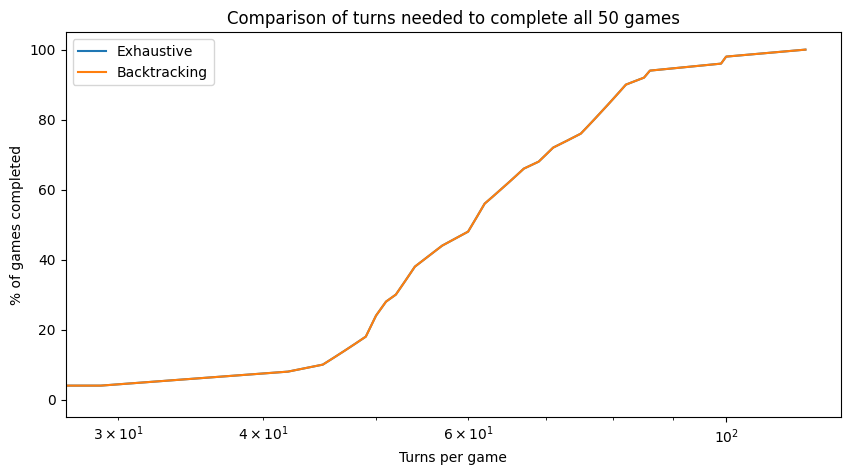

In [9]:
# Visualization of cumulative curves of numbers of turns taken per program
max_turn = max([max(results[player]) for player in results])
pyplot.figure(figsize=(10, 5))
for player in results:
    turns = [0] + sorted(results[player]) + [max_turn]
    games_completed_per_turn = [len([turn for turn in results[player] if turn <= t]) * 100.0 / NB_GAMES for t in turns]
    pyplot.plot(turns, games_completed_per_turn, label=player)
pyplot.title("Comparison of turns needed to complete all %d games" % (NB_GAMES))
pyplot.xlabel("Turns per game")
pyplot.ylabel("% of games completed")
pyplot.xscale("log")
pyplot.legend()
pyplot.show()

Visualizing is great, but it may be hard to conclude with just a plot. \
Here, we perform a statistical test that will give more insight on whether an algorithm is better than the other.

In [10]:
# Formal statistics to check if these curves are statistically significant
for i, player_1 in enumerate(results):
    for j, player_2 in enumerate(results):
        if j > i:
            test_result = scstats.mannwhitneyu(results[player_1], results[player_2], alternative="two-sided")
            print("Mann-Whitney U test between turns of program '%s' and of program '%s':" % (player_1, player_2), test_result)

Mann-Whitney U test between turns of program 'Exhaustive' and of program 'Backtracking': MannwhitneyuResult(statistic=1250.0, pvalue=1.0)
